In [4]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
# import data set
data = pd.read_csv('/Users/victorlee/Desktop/Data Science/Data set/Housing Price/data.csv')

# Data preprocessing
data = pd.get_dummies(data, columns=['street', 'city', 'statezip', 'country'])
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data = data.drop(columns=['date'])

# split data
X = data.drop(columns = ['price'])
y = data['price']

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Stadardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Define models to evaluate 
models = {
    'LinearRegression':{
        'model': LinearRegression(),
        'params':{}
    },
    'DecisionTree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20]
        } 
    },
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 10]
        }
    },
    'GradientBoosting':{
        'model': GradientBoostingRegressor(),
        'params':{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],
            'max_depth': [3, 5, 10]
        }
    }
}

In [8]:
results= []
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    results.append({
        'model': model_name,
        'best score': -grid_search.best_score_,
        'best params': grid_search.best_params_
    })

In [9]:
# Print out the results
for result in results:
    print(f"Model: {result['model']}")
    print(f"Best Cross-Validation MSE {result['best score']:.4f}")
    print(f"Best Parameters: {result['best params']}")
    print('--------------------')

Model: LinearRegression
Best Cross-Validation MSE 23292829480286907382012876150253027328.0000
Best Parameters: {}
--------------------
Model: DecisionTree
Best Cross-Validation MSE 79878723261.8528
Best Parameters: {'max_depth': 30, 'min_samples_split': 20}
--------------------
Model: RandomForest
Best Cross-Validation MSE 54747650828.3546
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
--------------------
Model: GradientBoosting
Best Cross-Validation MSE 51850804864.6475
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
--------------------


In [10]:
# select the best model and params and training 
best_model_info = min(results, key=lambda x:x['best score'])
best_model = models[best_model_info['model']]['model'].set_params(**best_model_info['best params'])
best_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(n_estimators=200)

In [11]:
# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Best model: {best_model_info["model"]}')
print(f'MSE: {mse:.3f}')

Best model: GradientBoosting
MSE: 963193439290.3864


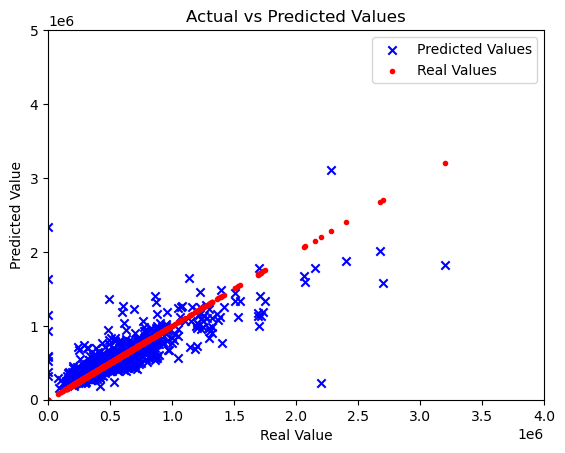

In [16]:
plt.scatter(y_test, y_pred, label='Predicted Values', color='blue', marker='x')
plt.scatter(y_test, y_test, label='Real Values', color='red', marker='.')
plt.xlim(0,4000000)
plt.ylim(0,5000000)
plt.title('Actual vs Predicted Values')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()